# Data 301 Group 11 Project
## Data Loading and Wrangling Functions

## Data Loading

### Import Package Statements

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Loading data into pd dataframes and wrangling

#### Declaring temporary variables to hold return of dataframes

In [12]:
def loadStatCanCPI():
    StatCanCPI = pd.read_csv('./processed/preprocessed/Stat_Can_CPI_1985_to_Now.csv')
    StatCanCPI = StatCanCPI.set_index('Products and product groups 4')
    return StatCanCPI
def loadStatCanBCHPIData():
    StatCanBCHPI = pd.read_csv('./processed/preprocessed/Stat_Can_HPI_BC-only_1986_to_2021_May.csv')
    StatCanBCHPI = StatCanBCHPI.drop(index=[1,2],axis=0)
    #Finds just columsn with January in the name
    colWithJan = [col for col in StatCanBCHPI.columns if 'Jan' in col]
    colUpdated = []
    #Maps column name from two-formats in dataset (pre-01 and 01 onward) to standard year-format
    for x in range(len(colWithJan)):
        if colWithJan[x][4:6] != "an":
            if (int(colWithJan[x][4:6])) > 80:
                colUpdated.append("19"+ colWithJan[x][4:6])
            elif int(colWithJan[x][4:6]) == 0:
                colUpdated.append("20" + colWithJan[x][4:6]) 
        else: colUpdated.append("20" + colWithJan[x][0:2])
    #replacing jan colum names with mapped names and dropping rest of columns
    StatCanBCHPI = StatCanBCHPI[colWithJan].set_axis(colUpdated, axis='columns')
    #Chanaging row access to name which better represents data
    StatCanBCHPI = StatCanBCHPI.set_axis(['BC New Housing Price Index'], axis='index')
    return StatCanBCHPI
def loadStatCanCanadaHPIData():
    StatCanCanadaHPI = pd.read_csv('./processed/preprocessed/Stat_Can_HPI_Canada_1981_to_2021_May.csv')
    return StatCanCanadaHPI
def loadCanadaPrimeInterestRate():
    CanadaPIR = pd.read_csv('./processed/preprocessed/Canada-Prime-Rate-History.csv')
    #Transposing data to place column names as dates
    CanadaPIR = CanadaPIR.transpose()
    CanadaPIR.columns = CanadaPIR.iloc[0]
    CanadaPIR.drop(index=CanadaPIR.index[0], axis=0, inplace=True)
    #Finds just columsn with January in the name
    colWithJan = [col for col in CanadaPIR.columns if 'Jan' in col]
    colUpdated = []
    #Maps column name from in dataset to standard year-format
    for x in range(len(colWithJan)):
        if (int(colWithJan[x][4:6])) > 80:
             colUpdated.append("19"+ colWithJan[x][4:6])
        elif int(colWithJan[x][4:6]) == 0 or int(colWithJan[x][4:6]) > 0:
            colUpdated.append("20" + colWithJan[x][4:6]) 
    #replacing jan colum names with mapped names and dropping rest of columns
    CanadaPIR = CanadaPIR[colWithJan].set_axis(colUpdated, axis='columns')
    return CanadaPIR
def loadMLSRegionalHPIData():
    MLSHPIData = pd.read_excel('./processed/preprocessed/MLS HPI - Seasonally Adjusted.xlsx',sheet_name=['AGGREGATE', 'OKANAGAN_VALLEY','GREATER_VANCOUVER'], usecols=['Date', 'One_Storey_Benchmark_SA', 'Two_Storey_Benchmark_SA', 'Townhouse_Benchmark_SA', 'Apartment_Benchmark_SA'])
    #Updating Keys for clarity/redability and alignment to research question
    MLSHPIData['Vancouver'] = MLSHPIData.pop('GREATER_VANCOUVER')
    MLSHPIData['Kelowna'] = MLSHPIData.pop('OKANAGAN_VALLEY')
    MLSHPIData['Canada'] = MLSHPIData.pop('AGGREGATE')
    #Cycling through keys and creating list for changing colums to add regional information, then setting horizontal index to be date in each key-value pair, then replacing column-names with new list
    for key in MLSHPIData.keys():
        colRenameInfo=[key + " " + 'One Storey Home', key + " " + 'Two Storey Home', key + " "  + 'Townhouse', key + " " + 'Apartment']
        MLSHPIData[key].set_index('Date',inplace=True)
        MLSHPIData[key].set_axis(colRenameInfo,axis='columns',inplace=True)
    #Joining all three regions together into one single dataframe
    return MLSHPIData['Vancouver'].join(MLSHPIData['Kelowna'].join(MLSHPIData['Canada']))
def loadWorldBankData():
    WorldBankData = pd.read_csv('./processed/preprocessed/World Bank Data - Indicators.csv')
    WorldBankData = WorldBankData.set_index('Year')
    #WorldBankData.drop(index=WorldBankData.index[1], axis=0, inplace=True)
    return WorldBankData

In [13]:
def loadAll():
    StatCanCPI = loadStatCanCPI()
    StatCanBCHPI = loadStatCanBCHPIData()
    StatCanCanadaHPI = loadStatCanCanadaHPIData()
    CanadaPIR = loadCanadaPrimeInterestRate()
    WorldBankData = loadWorldBankData()
    dataFrames = [StatCanCPI, StatCanBCHPI, CanadaPIR, WorldBankData]
    return dataFrames

def mergeDataframes():
    ourData = loadAll()
    #Merging StatCanCPI, StatCanBCHPI, CanadaPIR and WorldBankData all are wrangled into yearly sets.
    masterDF = ourData[0].append(ourData[3].append(ourData[1].append(ourData[2]))).sort_index(axis=1).convert_dtypes(int)
    return masterDF


masterDF = mergeDataframes()
MLSHPIData = loadMLSRegionalHPIData()

#collecting 2000 to 2021 data.
masterDFFrom2000to2021 = masterDF.iloc[:, masterDF.shape[1]-22:masterDF.shape[1]-1]
masterDFFrom1991to2021 = masterDF.iloc[:, masterDF.shape[1]-31:masterDF.shape[1]-1]

<AxesSubplot:xlabel='Date', ylabel='Canada Townhouse'>

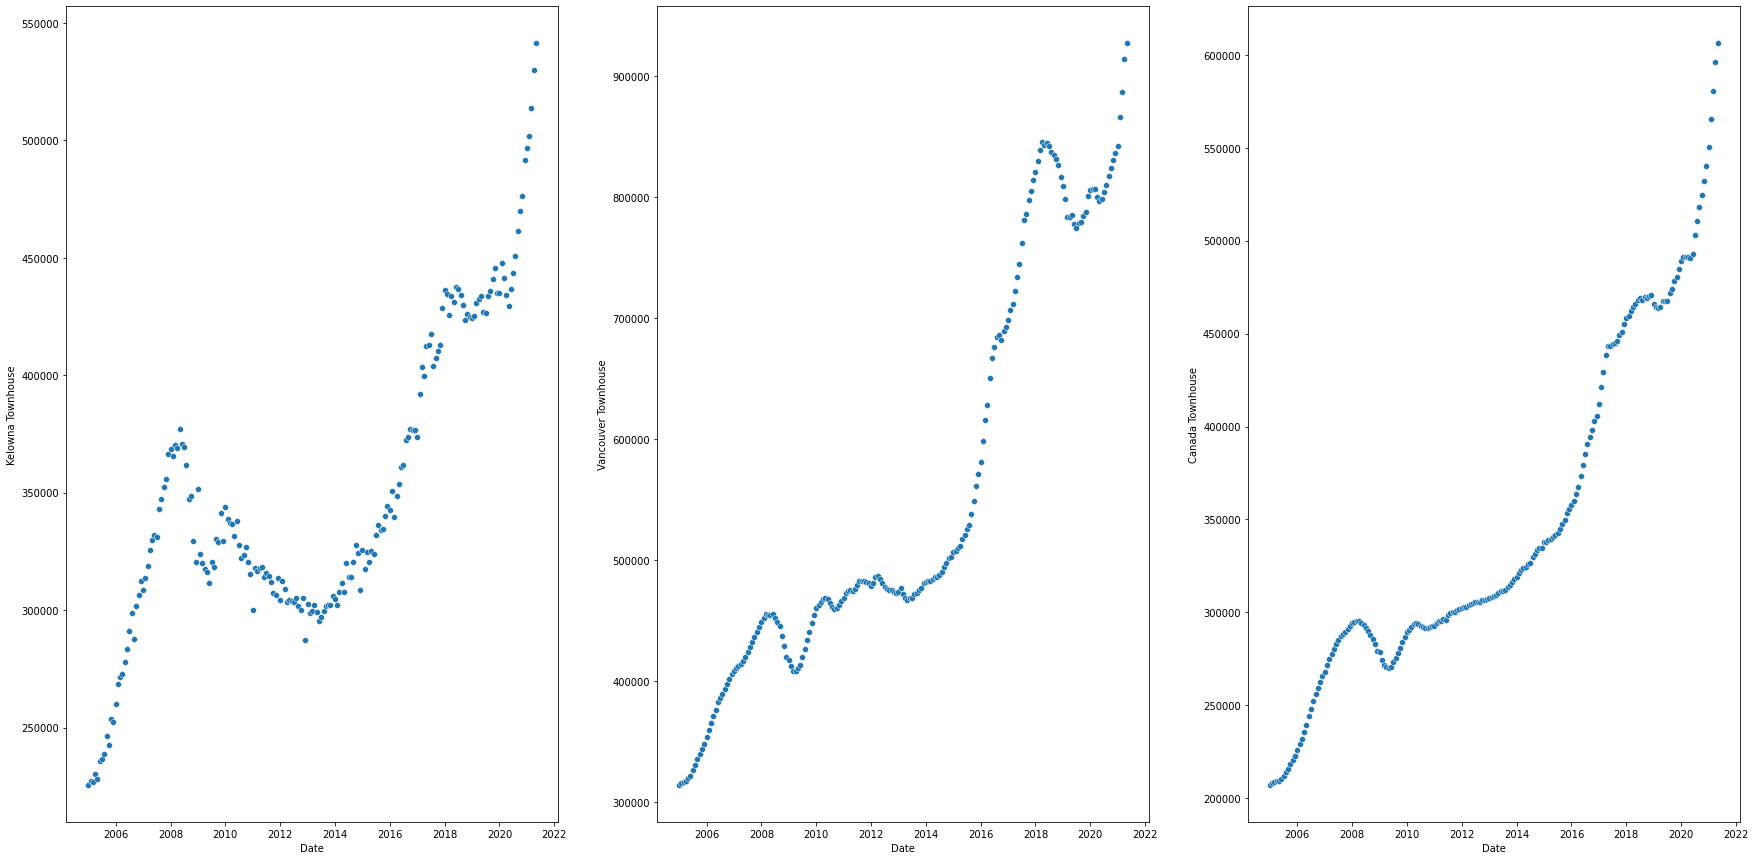

In [11]:
MLSHPIData

fig, axs = plt.subplots(ncols=3)
fig.set_figwidth(30)
fig.set_figheight(15)
sns.scatterplot(y=MLSHPIData['Kelowna Townhouse'],x=MLSHPIData.index,data=MLSHPIData,ax=axs[0])
sns.scatterplot(y=MLSHPIData['Vancouver Townhouse'],x=MLSHPIData.index,data=MLSHPIData,ax=axs[1])
sns.scatterplot(y=MLSHPIData['Canada Townhouse'],x=MLSHPIData.index,data=MLSHPIData,ax=axs[2]) 
